First 5 rows of dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


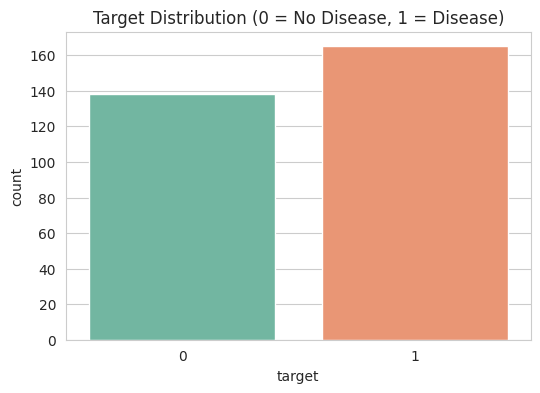

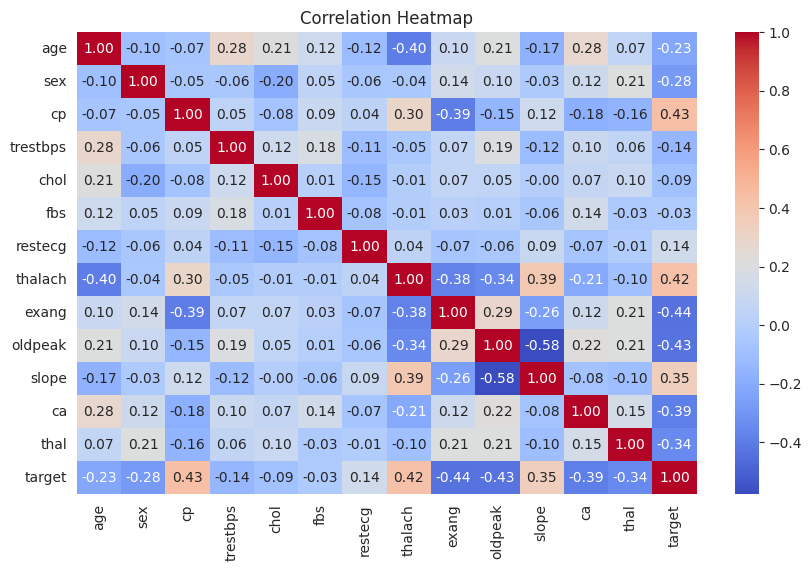


✅ Model trained successfully!
Accuracy: 0.8852459016393442


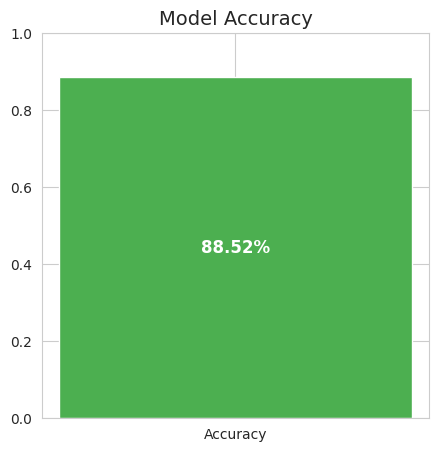

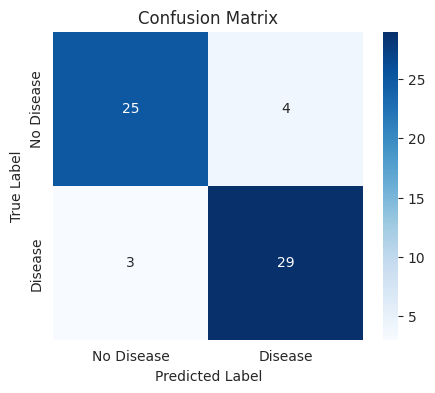


Prediction for new person:
❌ Person does not have heart disease


In [4]:
# ============================
# Heart Disease Prediction Project
# ============================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Ignore warnings
warnings.filterwarnings("ignore")

# Step 2: Load dataset
df = pd.read_csv("heart.csv")

print("First 5 rows of dataset:")
print(df.head())

# Step 3: Basic EDA (Graphs)
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train Logistic Regression model
model = LogisticRegression(max_iter=2000)  # increased iterations
model.fit(X_train, y_train)

# Step 7: Evaluate model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("\n✅ Model trained successfully!")
print("Accuracy:", acc)

# Step 8: Accuracy Bar Graph (Upgraded)
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")

plt.bar(["Accuracy"], [acc], color="#4CAF50", width=0.4)  # nice green
plt.ylim(0,1)
plt.title("Model Accuracy", fontsize=14)

# Add percentage text on bar
plt.text(0, acc/2, f"{acc*100:.2f}%", ha='center', va='center', fontsize=12,
         color="white", fontweight="bold")

plt.show()

# Step 9: Confusion Matrix with labels
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Step 10: Predict for new data
# Make sure input is a DataFrame with feature names
new_person = pd.DataFrame([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]],
                          columns=X.columns)

prediction = model.predict(new_person)

print("\nPrediction for new person:")
if prediction[0] == 1:
    print("✅ Person has heart disease")
else:
    print("❌ Person does not have heart disease")
